### Data exploration

In [1]:
# installation cell
# pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import math
# import shap
import seaborn as sns

In [ ]:
#read data
df = pd.read_csv('muontracks.csv')
# df = df[df['chi2MatchMCHMID'] > 0] # test
print(len(df['mcID'].unique()))
print(df['motherPDG'].unique()) #Print all the unique pdg codes we find
print(df['trackType'].unique()) # we have track types 0, 2, 3, 4 no 1's Bears the following meaning:
#From the documentation on mchmft:
# fTrackType: 0 -> this is an MFT-MCH-MID matched track, 2-> this is an
# MFT-MCH track, 3-> this is an MCH-MID track, 4-> this is an MCH track.
signal_pdg_codes = [411,421,431]   # Full [411,421,431,4122,4232,511,5132,521,531,541,5232,4132,5122]
keep_pdg_codes = [211,  321,411,421,431,511,521,531,541] # Full motherpdg.unique as above

31563
[ 211  321  431  411  421  511  223  221  113  130 4122  521   15  531
  443  331 4232  333 2212 5132  541 5232 4132 5122]
[3 0 2 4]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63807 entries, 0 to 63806
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   collisionID      63807 non-null  int64  
 1   trackID          63807 non-null  int64  
 2   mcID             63807 non-null  int64  
 3   eta              63778 non-null  float64
 4   pt               63807 non-null  float64
 5   p                63807 non-null  float64
 6   phi              63807 non-null  float64
 7   motherPDG        63807 non-null  int64  
 8   nClusters        63807 non-null  int64  
 9   trackType        63807 non-null  int64  
 10  pDca             63807 non-null  float64
 11  chi2             63807 non-null  float64
 12  chi2MatchMCHMID  63807 non-null  float64
 13  rabs             63807 non-null  float64
 14  isPrompt         63807 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.3 MB


In [5]:
df.columns

Index(['collisionID', 'trackID', 'mcID', 'eta', 'pt', 'p', 'phi', 'motherPDG',
       'nClusters', 'trackType', 'pDca', 'chi2', 'chi2MatchMCHMID', 'rabs',
       'isPrompt'],
      dtype='object')

In [6]:
df.describe()

/home/zinhle/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,collisionID,trackID,mcID,eta,pt,p,phi,motherPDG,nClusters,trackType,pDca,chi2,chi2MatchMCHMID,rabs,isPrompt
count,63807.000000,63807.000000,6.380700e+04,6.377800e+04,6.380700e+04,6.380700e+04,63807.000000,63807.000000,63807.000000,63807.000000,63807.000000,6.380700e+04,63807.000000,63807.000000,63807.000000
mean,639.223251,-8.604526,7.609383e+05,inf,6.939856e-01,4.533046e+34,1.196938,271.377388,10.373517,1.829784,70.273200,4.518396e+06,0.894978,37.547020,0.856035
std,459.568210,96.380512,4.205745e+05,NaN,1.050516e+01,1.963236e+36,1530.733823,200.223894,0.903859,1.536607,50.100397,7.046616e+08,1.777077,15.831025,0.351057
min,0.000000,-406.000000,1.027000e+03,-1.639920e+01,5.816330e-08,-1.786940e+04,-177684.000000,15.000000,6.000000,0.000000,0.112210,-1.384120e+08,-1.000000,2.430610,0.000000
25%,265.000000,-8.000000,4.318925e+05,-3.427545e+00,2.949625e-01,3.533625e+00,-1.525495,211.000000,10.000000,0.000000,36.190400,1.865230e-01,0.144531,25.263800,1.000000
50%,540.000000,-1.000000,7.591590e+05,-3.182870e+00,4.631390e-01,5.674180e+00,0.021147,211.000000,10.000000,3.000000,58.465500,3.281250e+00,0.699219,33.509000,1.000000
75%,977.000000,45.000000,1.082129e+06,-2.872152e+00,6.930630e-01,8.970835e+00,1.563560,321.000000,11.000000,3.000000,89.731100,2.000000e+02,1.421880,46.666600,1.000000
max,2241.000000,133.000000,2.052172e+06,inf,1.925760e+03,8.507060e+37,307854.000000,5232.000000,16.000000,4.000000,582.175000,1.750200e+11,15.937500,91.387700,1.000000


In [7]:
# df = df.drop(columns=['ID'])                                                        # Drop ID column
#Actual cut based on chi])] # Try to dr
# Reasonability cuts based on siegie's suggestions among other things
df = df[ (df['chi2'] <= 10) & (df['chi2']>0) ]
df = df[ (df['eta'] <= -2.5) & (df['eta']>-4) ]
df = df[ (df['p'] > 4)]
df = df[ (df['pt'] > 0.5)]
df = df[ (df['trackType'] == 3)] # Only do tracktype3 the mchmid matches, then ditch column
df = df.drop(columns=['trackType'])
df['signal'] = df['motherPDG'].isin(signal_pdg_codes).astype(int) #df['isPrompt']) &
df = df[df['motherPDG'].isin(keep_pdg_codes)] # Drop all non sanctioned PDG codes
# Simple description of signal vs background, eventually we'd like to unrestrict the PDG options, B / D meson parents
# df['signal']=df['signal'].astype(int)
df.describe() #describe post drop & setup to see if we can find what's the issue with plotting not happening
print(len(df['mcID'].unique()))
print(len(df['mcID']))
dupes = df[df["mcID"].duplicated(keep=False)]
print(dupes) #WHERE DO THE DUPLICATES KEEP COMING FROM!?!??!
df = df.drop(columns=['collisionID','trackID','mcID'])
df.describe()


7005
7020
       collisionID  trackID     mcID      eta        pt         p       phi  \
4812            88     -191   486337 -3.09819  0.608528   6.75558 -2.166250   
5542           329      -58   642898 -2.94566  0.589310   5.62078 -0.177066   
6142          1099     -116  1271788 -3.96179  1.275810  33.53500 -2.206900   
9417          1005       -8   797710 -3.96257  0.760914  20.01640  1.801280   
15013           37     -326   423607 -3.23468  0.655570   8.33806 -2.912270   
16672         1537       -9  1221741 -2.99301  0.558190   5.58072 -2.874280   
17660          802     -135  1070259 -3.21561  0.502145   6.26644 -2.303360   
18382          888       -8   730853 -3.43008  0.840378  12.98870  2.563050   
23536          177     -381   561439 -3.74132  0.968093  20.41580 -3.007480   
26054         1371       -9  1070259 -2.97830  0.584517   5.75903 -2.471800   
30254         1334       -9  1041175 -3.20282  0.692360   8.53070  2.586180   
30362          856       -5   642550 -3.16

,eta,pt,p,phi,motherPDG,nClusters,pDca,chi2,chi2MatchMCHMID,rabs,isPrompt,signal
count,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000
mean,-3.168519,0.884638,11.253163,0.014160,294.106838,10.400855,90.009942,0.162687,0.831071,38.246859,0.878205,0.251425
std,0.351288,0.563928,8.774630,1.832054,91.824318,0.902419,66.452094,0.231922,0.646463,16.205224,0.327072,0.433863
min,-3.998650,0.500061,4.001020,-3.140960,211.000000,7.000000,0.814877,0.015442,0.002945,13.061800,0.000000,0.000000
25%,-3.431687,0.591085,6.335233,-1.518898,211.000000,10.000000,43.435150,0.082031,0.371094,24.567650,1.000000,0.000000
50%,-3.148025,0.716835,8.871900,0.022209,321.000000,10.000000,71.423300,0.117920,0.675781,34.949350,1.000000,0.000000
75%,-2.887855,0.969955,13.019375,1.585552,411.000000,11.000000,117.642750,0.176758,1.125000,49.359400,1.000000,1.000000
max,-2.500060,15.684100,217.975000,3.140950,531.000000,16.000000,582.175000,6.500000,8.625000,87.182600,1.000000,1.000000


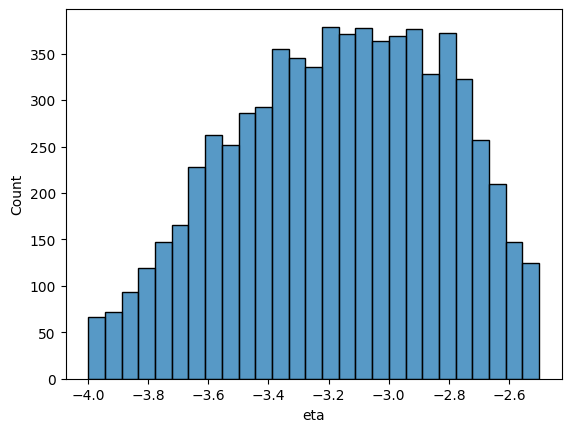

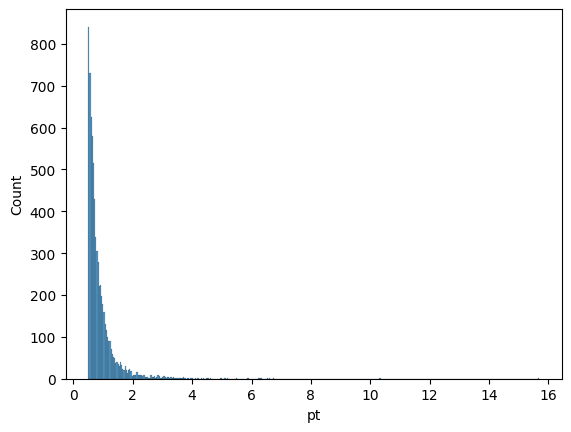

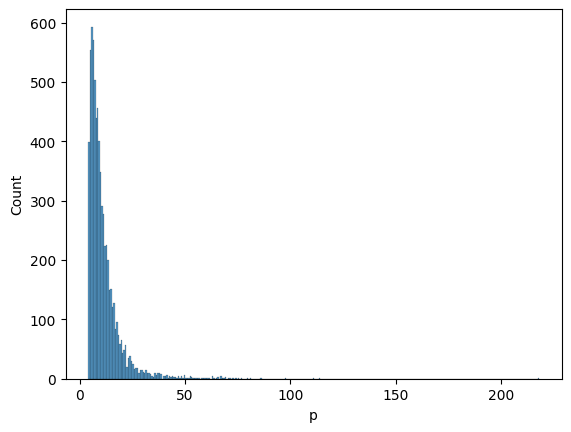

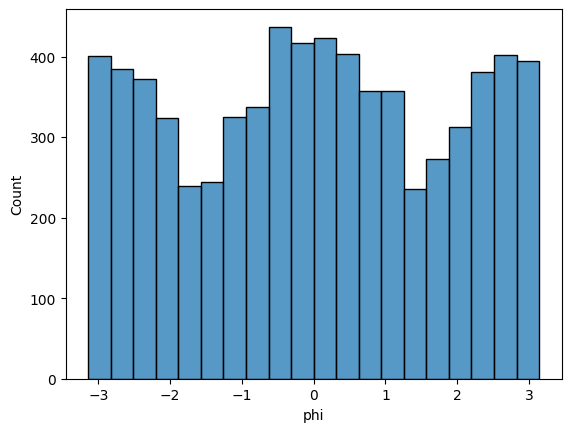

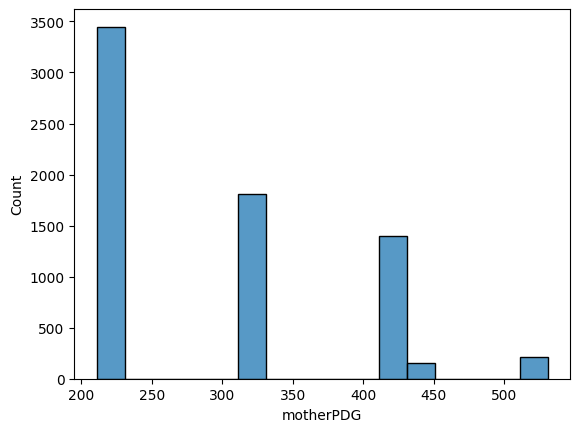

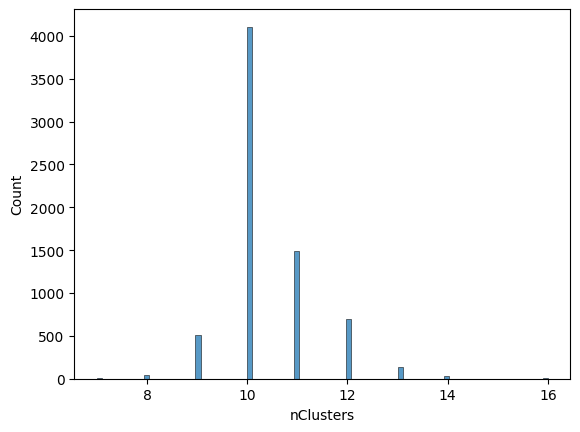

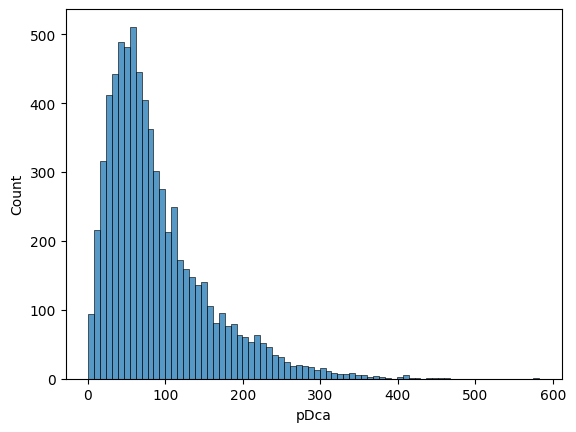

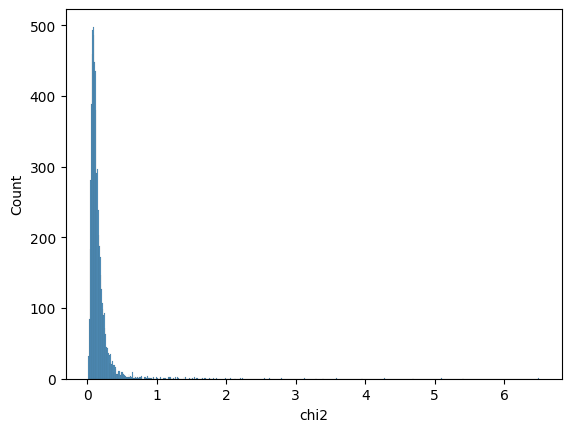

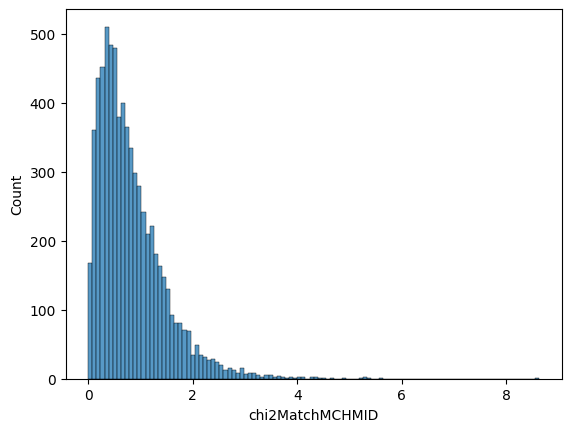

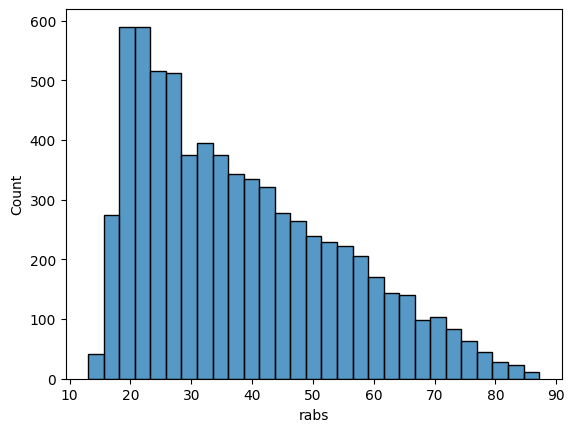

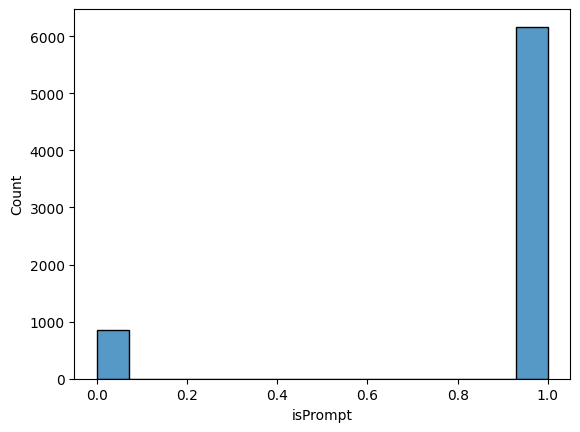

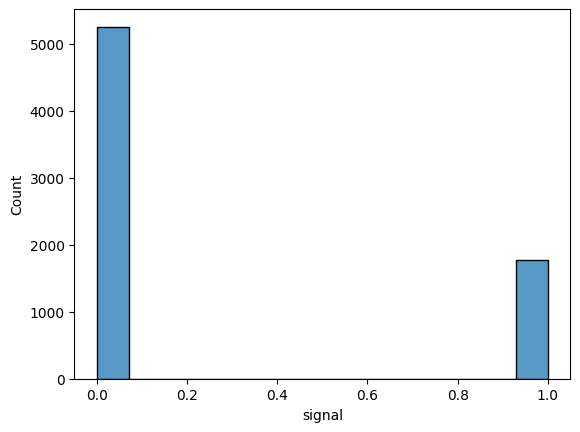

In [8]:
for entry in df.columns:
    sns.histplot(df[entry], log_scale=False)  # log x-axis
    plt.show()

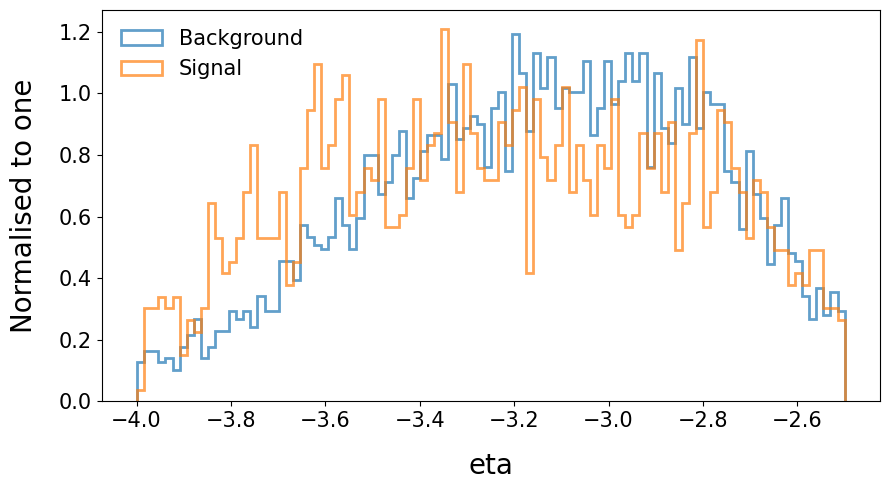

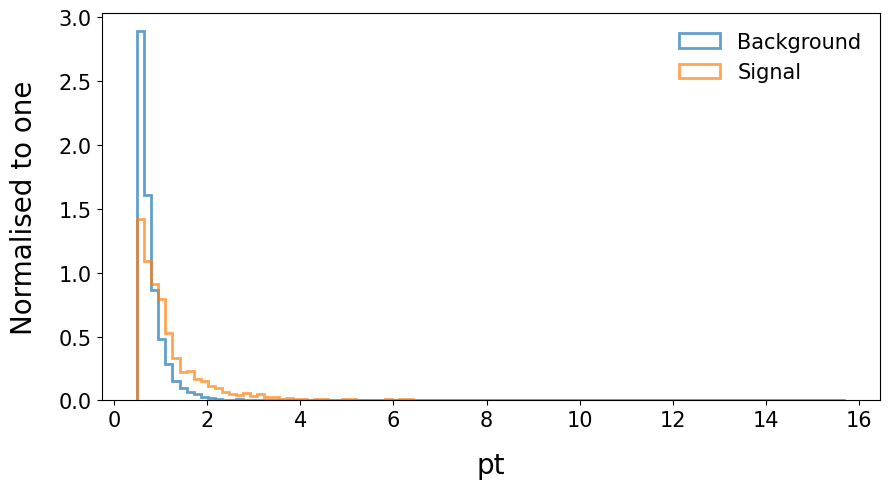

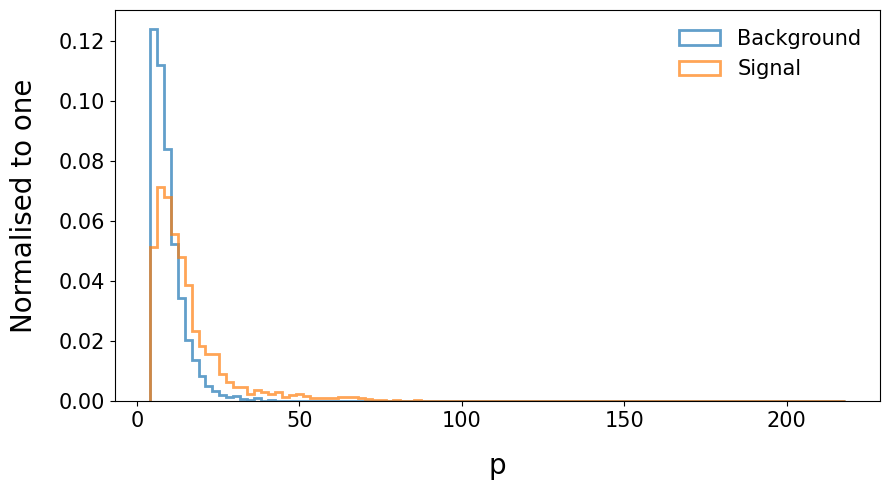

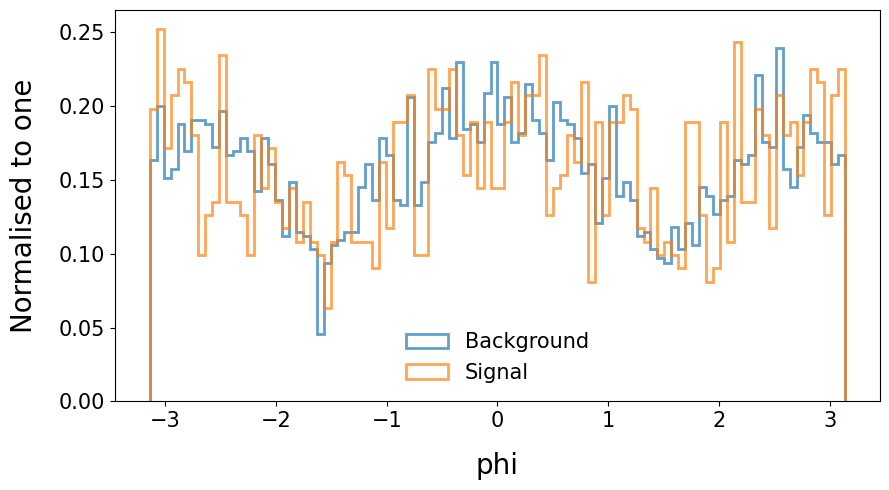

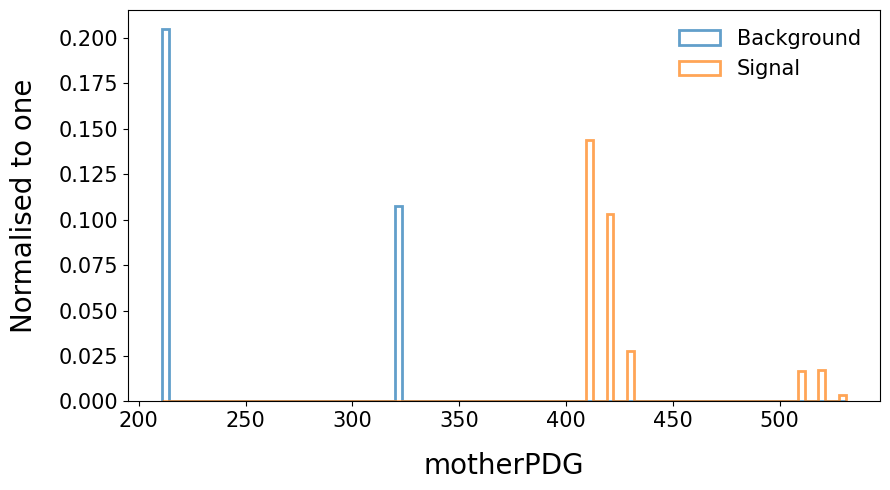

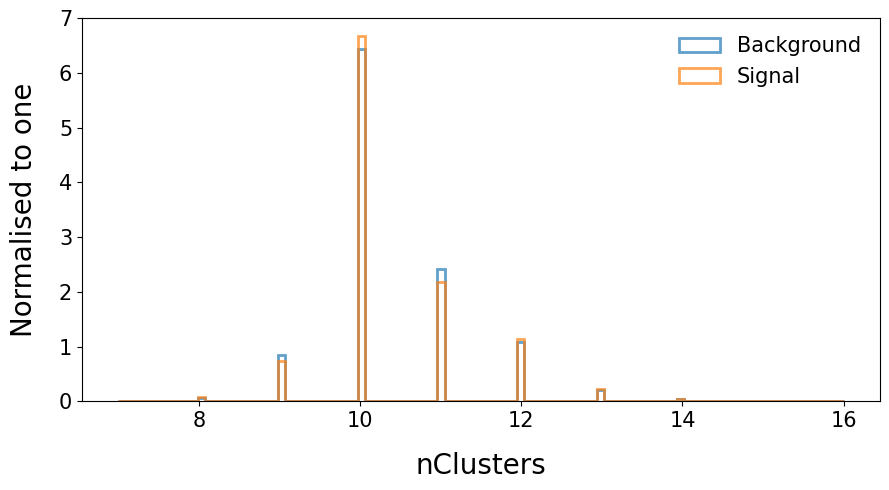

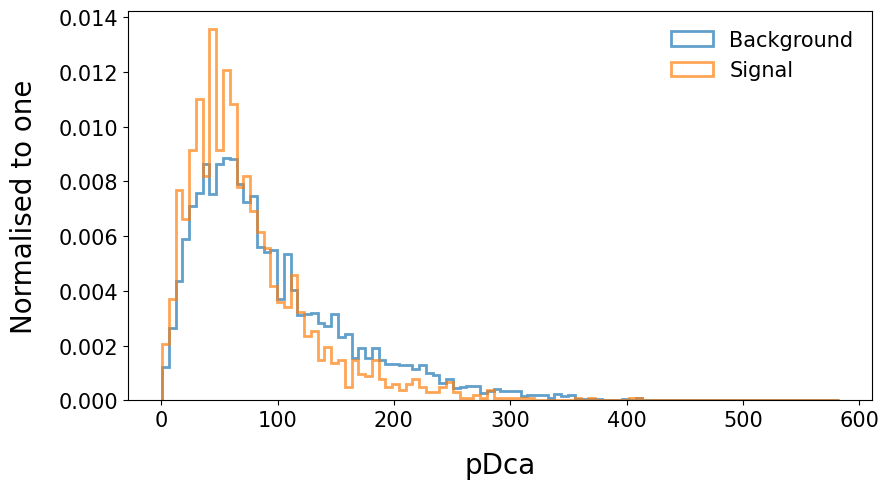

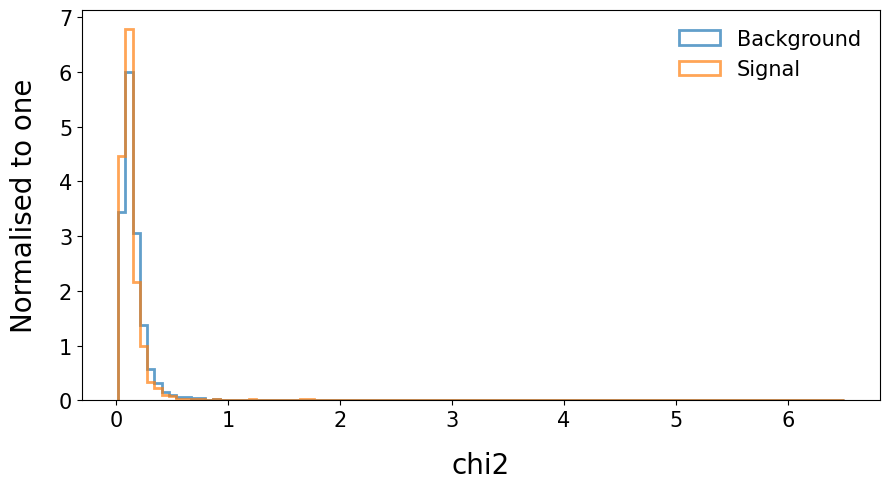

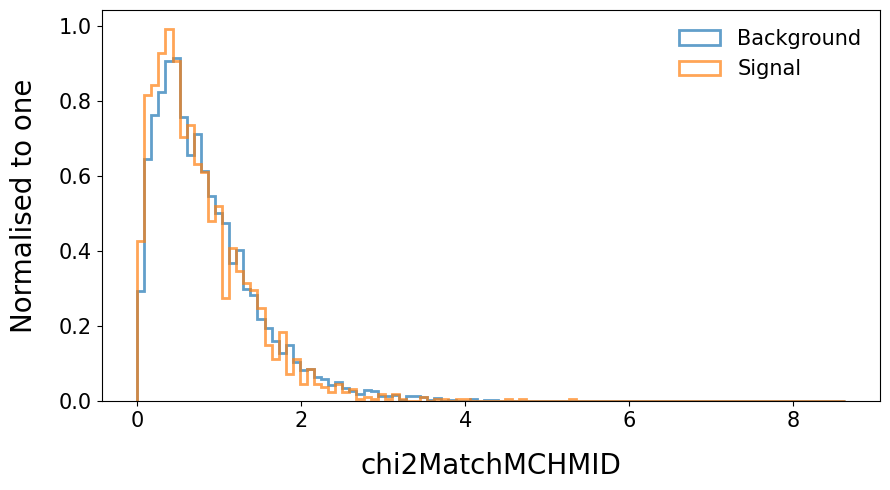

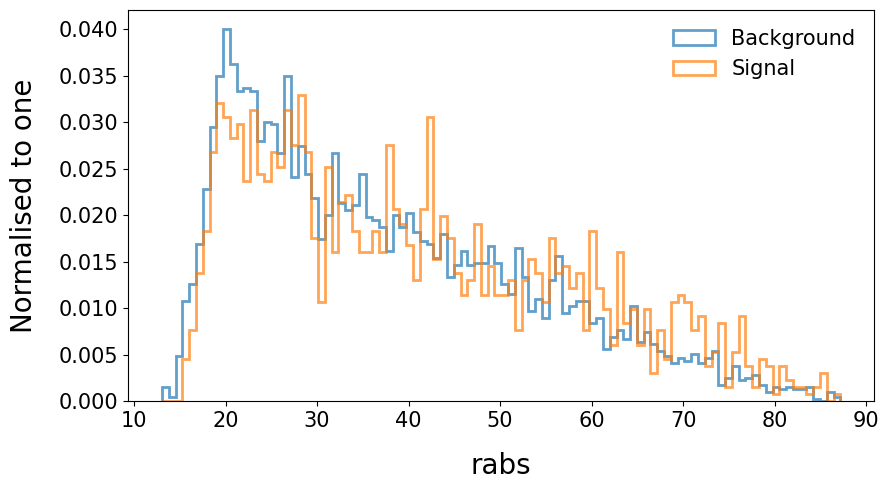

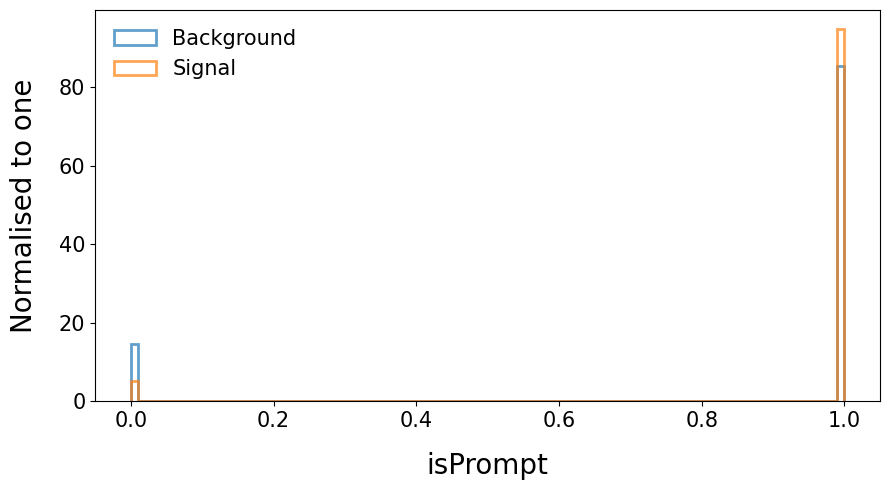

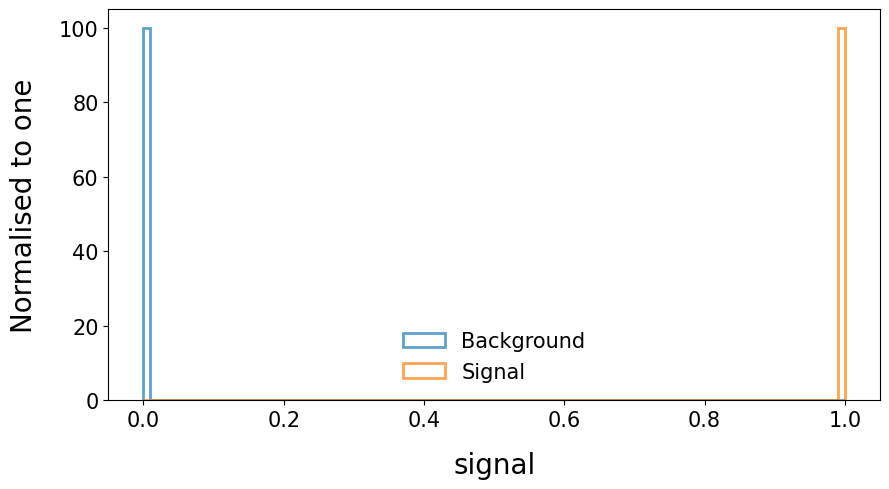

In [9]:
# #Discriminate between failure and success based on individual input variables
background = df[df['signal'] == 0] # successful=1 parts arne't what we're estimating so background
signal = df[df['signal'] == 1] # Failure=0 seeking.



#setup plot function
def draw(feature,nbins = 100):
   sig=signal[feature]
   bkg=background[feature]

   from matplotlib.lines import Line2D

   rng = np.random.default_rng(seed=123)

   weig1 = np.ones_like(signal[feature]) / float(len(signal[feature]))
   weig2 = np.ones_like(background[feature]) / float(len(background[feature]))
   minn= min(background[feature].min(),signal[feature].min())
   maxx =max(background[feature].max(),signal[feature].max())

   fig, ax = plt.subplots(figsize=(9,5))
   ax.hist(bkg, bins=nbins, histtype='step', range=(minn, maxx), label=r'Background', alpha=.7, linewidth=2,density=True)
   ax.hist(sig, bins=nbins, histtype='step', range=(minn, maxx), label=r'Signal', alpha=.7, linewidth=2,density=True)


   plt.ylabel('Normalised to one', fontsize=20, labelpad=15)
   plt.xlabel(feature, fontsize=20, labelpad=15)
   plt.xticks(fontsize=15, rotation=0)
   plt.yticks(fontsize=15)
   plt.legend(fontsize=15)
   plt.tight_layout()
   plt.legend(fontsize=15, loc='best', frameon=False)
#    plt.savefig(feature+'.pdf')
   plt.show()

#plot and discriminate:
for name in df.columns:
  draw(name)

In [ ]:
#Pairplot to get an idea of variable dependencies
pp = sns.pairplot(df[df.columns], plot_kws={'alpha': 0.25})
plt.suptitle('Pair Plot of Selected Features', y=1.02)

for ax in pp.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

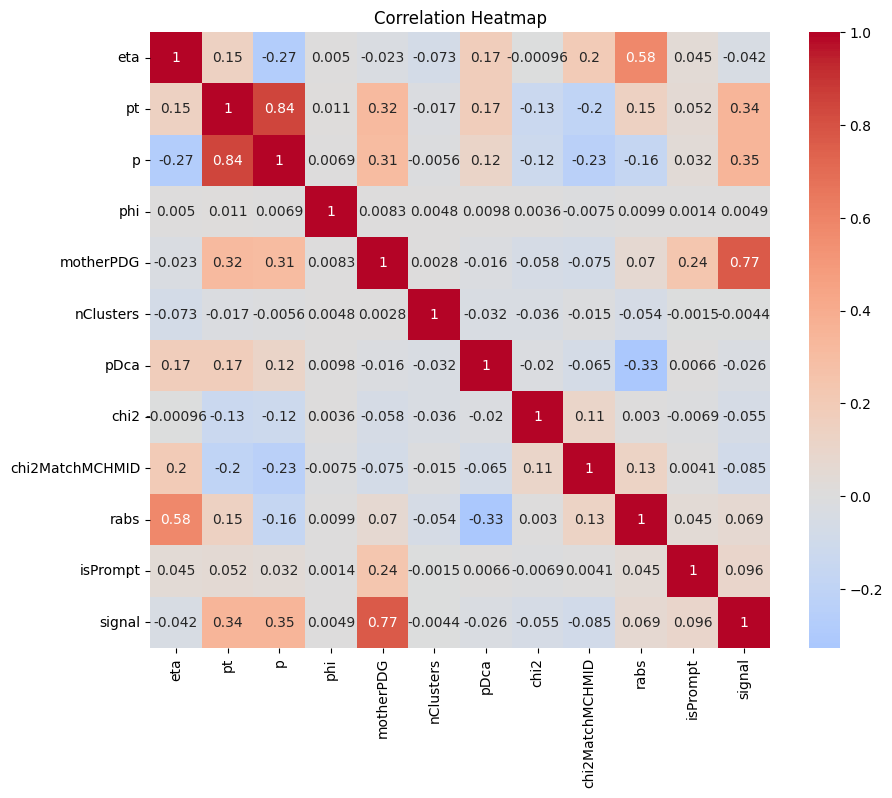

In [ ]:
#Dependency/correlation matrix
# Heatmap of Correlations
plt.figure(figsize=(10, 8))
corr_matrix = df[df.columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning

## Data preparation